In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import warnings 
warnings.filterwarnings("ignore")

In [4]:
# load train data
train_df = pd.read_csv(r"C:\Users\Anish\Desktop\ctrain.csv",low_memory=False)



In [5]:
train_df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
train_df=train_df[:8000]

In [7]:
train_df.shape

(8000, 28)

In [8]:
# check for null values
train_df.isna().sum() 


ID                             0
Customer_ID                    0
Month                          0
Name                         793
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       1177
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                 952
Delay_from_due_date            0
Num_of_Delayed_Payment       560
Changed_Credit_Limit           0
Num_Credit_Inquiries         159
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age           741
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      337
Payment_Behaviour              0
Monthly_Balance              105
Credit_Score                   0
dtype: int64

In [9]:
#There are null values in

#Name,Monthly_Inhand_Salary,Type_of_Loan,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_History_Age,Amount_invested_monthly,Monthly_Balance

In [10]:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8000 non-null   object 
 1   Customer_ID               8000 non-null   object 
 2   Month                     8000 non-null   object 
 3   Name                      7207 non-null   object 
 4   Age                       8000 non-null   object 
 5   SSN                       8000 non-null   object 
 6   Occupation                8000 non-null   object 
 7   Annual_Income             8000 non-null   object 
 8   Monthly_Inhand_Salary     6823 non-null   float64
 9   Num_Bank_Accounts         8000 non-null   int64  
 10  Num_Credit_Card           8000 non-null   int64  
 11  Interest_Rate             8000 non-null   int64  
 12  Num_of_Loan               8000 non-null   object 
 13  Type_of_Loan              7048 non-null   object 
 14  Delay_fr

In [11]:
train_df.describe()


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,6823.000000,8000.000000,8000.000000,8000.000000,8000.000000,7841.000000,8000.000000,8000.000000
mean,4299.166681,17.031125,24.076750,73.933875,21.642625,23.061599,32.312193,1374.858962
std,3202.084855,119.001557,138.319615,466.972928,14.749478,166.795965,5.169516,8159.149111
min,355.208333,0.000000,0.000000,1.000000,-5.000000,0.000000,20.172942,0.000000
25%,1698.773333,3.000000,4.000000,7.000000,11.000000,3.000000,27.980463,29.485471
50%,3211.081667,6.000000,5.000000,14.000000,19.000000,5.000000,32.330276,69.717948
75%,5978.466667,8.000000,7.000000,20.000000,29.000000,9.000000,36.593778,167.081471
max,14828.983333,1777.000000,1486.000000,5721.000000,67.000000,2592.000000,48.247003,82204.000000


# Removing unwanted symbols/characters present in rows 

In [12]:
# identify numerical columns with symbols present in rows
train_df.select_dtypes(include='object').columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [13]:
#Columns must be  numeric datatype:

#Age,Annual_Income,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Amount_invested_monthly,Monthly_Balance

In [14]:

convert_cols = ['Age',
       'Annual_Income', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Outstanding_Debt', 
       'Amount_invested_monthly','Monthly_Balance']
# check unique values in all columns
for col in train_df.columns:
    print(f"\n{col}\n",train_df[col].unique())



     


ID
 ['0x1602' '0x1603' '0x1604' ... '0x44db' '0x44dc' '0x44dd']

Customer_ID
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' 'CUS_0xb891' 'CUS_0x1cdb'
 'CUS_0x95ee' 'CUS_0x284a' 'CUS_0x5407' 'CUS_0x4157' 'CUS_0xba08'
 'CUS_0xa66b' 'CUS_0xc0ab' 'CUS_0x3e45' 'CUS_0x6c66' 'CUS_0xff4'
 'CUS_0x33d2' 'CUS_0x6070' 'CUS_0xfdb' 'CUS_0x3553' 'CUS_0x4100'
 'CUS_0x132f' 'CUS_0xa16e' 'CUS_0xac86' 'CUS_0x5b48' 'CUS_0xa5f9'
 'CUS_0x4d43' 'CUS_0xb95f' 'CUS_0x3edc' 'CUS_0xbffe' 'CUS_0xb681'
 'CUS_0x9a71' 'CUS_0x6048' 'CUS_0x95b5' 'CUS_0x4004' 'CUS_0xb101'
 'CUS_0x9b94' 'CUS_0x4080' 'CUS_0x706a' 'CUS_0x42ac' 'CUS_0x571f'
 'CUS_0xb5ff' 'CUS_0x6a1b' 'CUS_0x9bc1' 'CUS_0xc65' 'CUS_0xaedb'
 'CUS_0x8e9b' 'CUS_0x609d' 'CUS_0x75c6' 'CUS_0x9b3c' 'CUS_0x22a3'
 'CUS_0xb14' 'CUS_0xb986' 'CUS_0xbe1b' 'CUS_0x9ce6' 'CUS_0x6ffb'
 'CUS_0x4315' 'CUS_0x3f5b' 'CUS_0x9d78' 'CUS_0x47db' 'CUS_0x8f17'
 'CUS_0x7d0b' 'CUS_0x7504' 'CUS_0x774' 'CUS_0x9f70' 'CUS_0xab76'
 'CUS_0x5cdf' 'CUS_0x2184' 'CUS_0xa156' 'CUS_0x74f2' 'CUS_0x308b'
 'C

In [15]:
#remove unwanted characters from the selected columns using for loop
for col in convert_cols:  
    train_df[col] = train_df[col].str.strip('-_') #removes - and _ from beginning and end of values



In [16]:
# remove unwanted characters from rest of the columns
# replace empty row with nan
train_df['Changed_Credit_Limit'].str.strip().replace('', np.nan)

# to apply the changes to whole dataframe
train_df.replace('', np.NaN, inplace=True) #replaces blank rows
train_df.replace('_______', np.NaN, inplace=True)


In [17]:
for col in train_df.columns:
    print(f"\n{col}\n",train_df[col].unique())



ID
 ['0x1602' '0x1603' '0x1604' ... '0x44db' '0x44dc' '0x44dd']

Customer_ID
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' 'CUS_0xb891' 'CUS_0x1cdb'
 'CUS_0x95ee' 'CUS_0x284a' 'CUS_0x5407' 'CUS_0x4157' 'CUS_0xba08'
 'CUS_0xa66b' 'CUS_0xc0ab' 'CUS_0x3e45' 'CUS_0x6c66' 'CUS_0xff4'
 'CUS_0x33d2' 'CUS_0x6070' 'CUS_0xfdb' 'CUS_0x3553' 'CUS_0x4100'
 'CUS_0x132f' 'CUS_0xa16e' 'CUS_0xac86' 'CUS_0x5b48' 'CUS_0xa5f9'
 'CUS_0x4d43' 'CUS_0xb95f' 'CUS_0x3edc' 'CUS_0xbffe' 'CUS_0xb681'
 'CUS_0x9a71' 'CUS_0x6048' 'CUS_0x95b5' 'CUS_0x4004' 'CUS_0xb101'
 'CUS_0x9b94' 'CUS_0x4080' 'CUS_0x706a' 'CUS_0x42ac' 'CUS_0x571f'
 'CUS_0xb5ff' 'CUS_0x6a1b' 'CUS_0x9bc1' 'CUS_0xc65' 'CUS_0xaedb'
 'CUS_0x8e9b' 'CUS_0x609d' 'CUS_0x75c6' 'CUS_0x9b3c' 'CUS_0x22a3'
 'CUS_0xb14' 'CUS_0xb986' 'CUS_0xbe1b' 'CUS_0x9ce6' 'CUS_0x6ffb'
 'CUS_0x4315' 'CUS_0x3f5b' 'CUS_0x9d78' 'CUS_0x47db' 'CUS_0x8f17'
 'CUS_0x7d0b' 'CUS_0x7504' 'CUS_0x774' 'CUS_0x9f70' 'CUS_0xab76'
 'CUS_0x5cdf' 'CUS_0x2184' 'CUS_0xa156' 'CUS_0x74f2' 'CUS_0x308b'
 'C

# Conversion of  datatype to int/ float for selected coloumns

In [18]:
train_df['Age']=train_df['Age'].astype(int)
train_df['Annual_Income']=train_df['Annual_Income'].astype(float)
train_df['Num_of_Loan']=train_df['Num_of_Loan'].astype(int)
train_df['Num_of_Delayed_Payment']=train_df['Num_of_Delayed_Payment'].astype(float)
train_df['Changed_Credit_Limit']=train_df['Changed_Credit_Limit'].astype(float)
train_df['Outstanding_Debt'] = train_df['Outstanding_Debt'].astype(float)
train_df['Amount_invested_monthly']=train_df['Amount_invested_monthly'].astype(float)
train_df['Monthly_Balance'] =train_df['Monthly_Balance'].astype(float)



# EDA

In [19]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [20]:

train_df.nunique()

ID                          8000
Customer_ID                 1000
Month                          8
Name                         980
Age                          216
SSN                         1001
Occupation                    15
Annual_Income               1074
Monthly_Inhand_Salary       1053
Num_Bank_Accounts            107
Num_Credit_Card              183
Interest_Rate                205
Num_of_Loan                   51
Type_of_Loan                 673
Delay_from_due_date           73
Num_of_Delayed_Payment        89
Changed_Credit_Limit        1614
Num_Credit_Inquiries         128
Credit_Mix                     4
Outstanding_Debt             998
Credit_Utilization_Ratio    8000
Credit_History_Age           404
Payment_of_Min_Amount          3
Total_EMI_per_month         1190
Amount_invested_monthly     7308
Payment_Behaviour              7
Monthly_Balance             7895
Credit_Score                   3
dtype: int64

In [21]:
# can drop ID, Name and SSN as they are identifiers and not useful for visualization
train_df1 = train_df.drop(['ID', 'Name', 'SSN'], axis=1)

In [22]:

train_df1.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [23]:
train_df1['Age'].value_counts() # age showing very high values, needs to be replaced

36      290
34      276
19      271
30      269
40      264
       ... 
223       1
1232      1
4659      1
6895      1
4958      1
Name: Age, Length: 216, dtype: int64

In [24]:
# check Age values greater than 56
train_df1[train_df1['Age']>56].sort_values('Age')


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5921,CUS_0x5793,February,112,Writer,2.051323e+04,1508.435833,6,9,22,2,...,Standard,1653.86,25.866349,14 Years and 11 Months,Yes,32.577546,83.277946,Low_spent_Large_value_payments,304.988092,Poor
3126,CUS_0x3ca6,July,123,Journalist,3.810736e+04,2955.613333,8,7,12,3,...,_,1472.70,36.921040,22 Years and 9 Months,No,73.579468,207.722437,Low_spent_Small_value_payments,304.259428,Poor
122,CUS_0x33d2,March,181,Scientist,3.199378e+04,2942.148333,6,6,7,2,...,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.257089,Low_spent_Small_value_payments,274.816447,Standard
7616,CUS_0xbc14,January,181,NaN,8.795702e+04,7453.751667,2,5,9,4,...,Good,811.01,41.470014,19 Years and 3 Months,No,195.913703,265.660815,High_spent_Medium_value_payments,533.800649,Poor
2950,CUS_0xb563,July,223,Journalist,1.672945e+07,1219.727083,6,6,11,1,...,_,1124.16,28.025990,27 Years and 10 Months,Yes,13.268054,96.665910,Low_spent_Large_value_payments,282.038744,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,CUS_0x4ea5,July,8352,Mechanic,1.995176e+04,1592.647083,1,1,12,2,...,Good,1463.07,37.994108,33 Years and 2 Months,No,28.213058,149.593181,!@9#%8,261.458469,Standard
4777,CUS_0x8e53,February,8394,Media_Manager,2.114560e+04,1604.132917,2,7,4,1,...,_,969.19,24.133556,17 Years and 11 Months,No,47203.000000,122.505148,Low_spent_Medium_value_payments,305.240350,Poor
2102,CUS_0x8caf,July,8406,Developer,1.878488e+04,1371.406667,8,3,26,7,...,Standard,2076.13,37.164246,18 Years and 4 Months,Yes,108.033671,90.131705,Low_spent_Small_value_payments,228.975290,Poor
6532,CUS_0x68a8,May,8562,Entrepreneur,8.227855e+03,656.654583,6,8,31,7,...,Bad,2695.38,34.814899,11 Years and 6 Months,Yes,28.012865,60.195984,Low_spent_Small_value_payments,267.456609,Poor


In [25]:
# change all values above 56 to nan for better graph
train_df1.loc[train_df1['Age']>56,'Age'] =np.nan


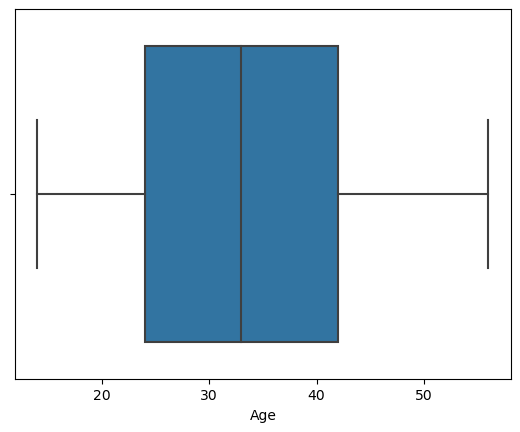

In [26]:

sns.boxplot(train_df1['Age'])
plt.show()
# Majority of customers are from age 24-42.

<AxesSubplot:xlabel='Count', ylabel='Month'>

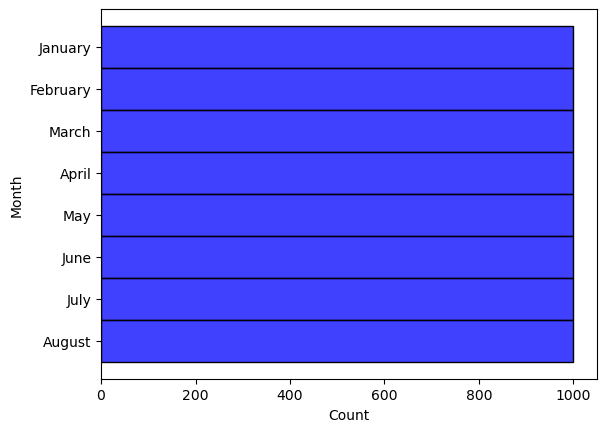

In [27]:
sns.histplot(data=train_df1, y="Month",color = 'blue')

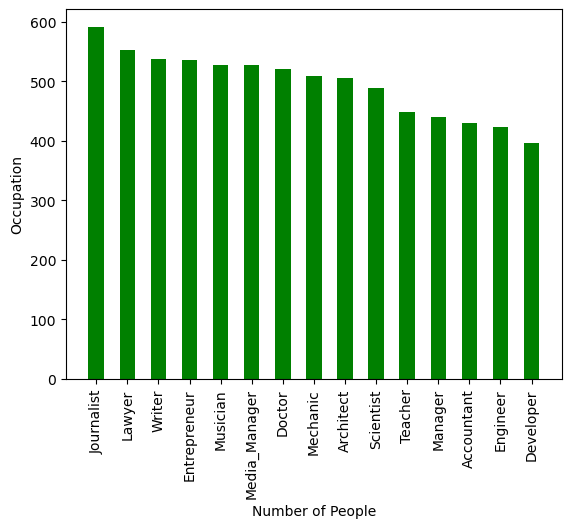

In [28]:
bars_count = train_df1.Occupation.value_counts().values
bars_label =train_df1.Occupation.value_counts().index
plt.bar(bars_label, bars_count, color = 'green', width = .5)

plt.xticks(range(len(bars_label)), bars_label, rotation='90')
plt.ylabel("Occupation")
plt.xlabel("Number of People")
plt.show()

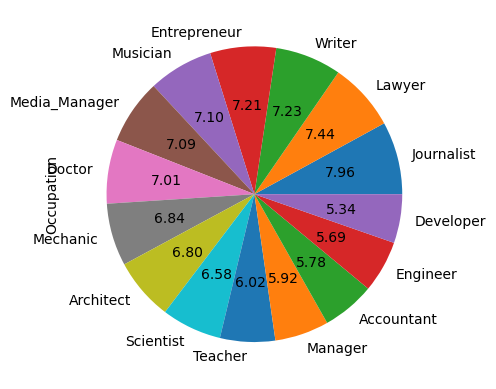

In [37]:
train_df1['Occupation'].value_counts().plot.pie(autopct='%.2f');

In [30]:
#sns.histplot(data=train_df1, x="Annual_Income", binwidth=3)

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Count'>

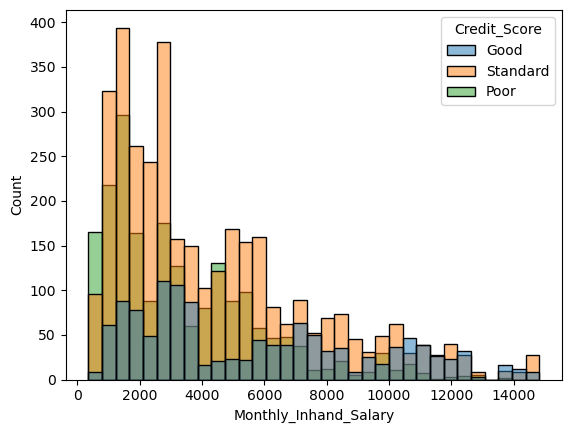

In [31]:
sns.histplot(data=train_df1, x="Monthly_Inhand_Salary", hue="Credit_Score")

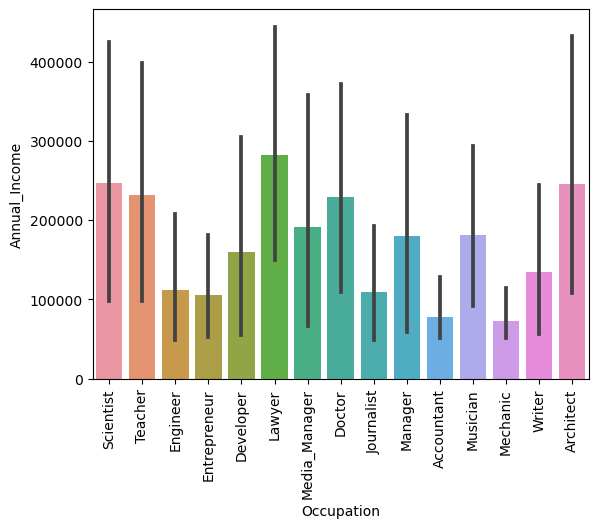

In [32]:
sns.barplot(y = train_df1['Annual_Income'], x =train_df1['Occupation'])
plt.xticks(rotation=90)
plt.show()

In [33]:
train_df1.isna().sum() 

Customer_ID                    0
Month                          0
Age                          252
Occupation                   563
Annual_Income                  0
Monthly_Inhand_Salary       1177
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                 952
Delay_from_due_date            0
Num_of_Delayed_Payment       560
Changed_Credit_Limit         165
Num_Credit_Inquiries         159
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age           741
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      337
Payment_Behaviour              0
Monthly_Balance              105
Credit_Score                   0
dtype: int64